<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/12_26Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1. 데이터 탐색 및 분석 설계 (EDA & Analysis Design)**

본 분석의 목적은 통신사 고객 데이터를 기반으로 이탈(Churn)에 영향을 미치는 주요 요인을 탐색하고, 이후 예측 모델링을 위한 가설 및 평가 기준을 설정하는 것이다.
EDA 단계에서는 이탈 여부(Churn)를 중심으로 범주형 및 수치형 변수들의 분포 차이를 시각적으로 분석한다.

## 1. 라이브러리 로드 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


## 1-1. 데이터 기본 구조 확인

In [7]:
df.shape


(7043, 21)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


TotalCharges 변수 전처리

TotalCharges 변수는 숫자형 변수임에도 object 타입으로 저장되어 있으며, 일부 결측치를 포함하고 있다.
이는 가입 기간이 0개월인 신규 고객에서 발생한 것으로 판단되며, 분석에서는 해당 행을 제거한다.

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df = df.dropna()


## 2. 타겟 변수(Churn) 분포 확인

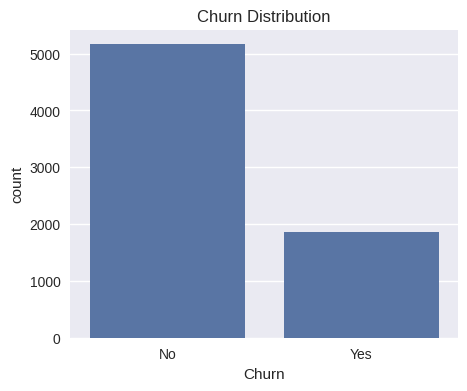

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


In [12]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.734215
Yes,0.265785


전체 고객 중 약 26%가 이탈 고객으로 확인된다.

클래스 불균형이 존재하므로, 단순 정확도(Accuracy)만으로는 모델 성능을 평가하기 어렵다.

## 3. 범주형 변수에 따른 이탈률 분석

## 3-1. Contract 유형별 이탈률

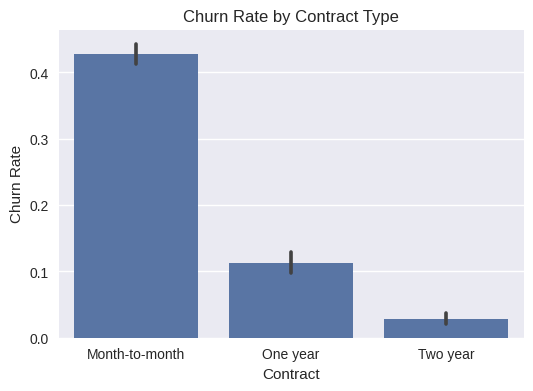

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='Contract',
    y=(df['Churn'] == 'Yes').astype(int)
)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()


Month-to-month 계약 고객의 이탈률이 가장 높음

장기 계약(1년, 2년)은 고객 유지에 효과적임을 시사

## 3-2. InternetService 유형별 이탈률

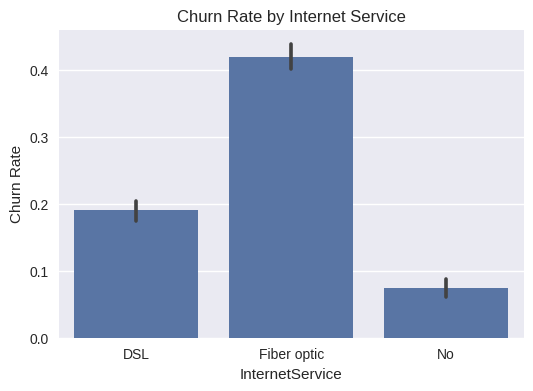

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='InternetService',
    y=(df['Churn'] == 'Yes').astype(int)
)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Internet Service")
plt.show()


Fiber optic 서비스 이용 고객의 이탈률이 상대적으로 높음

고가 요금 또는 품질 불만 가능성 추정

## 4. 수치형 변수 분포 비교

## 4-1. tenure (가입 기간)

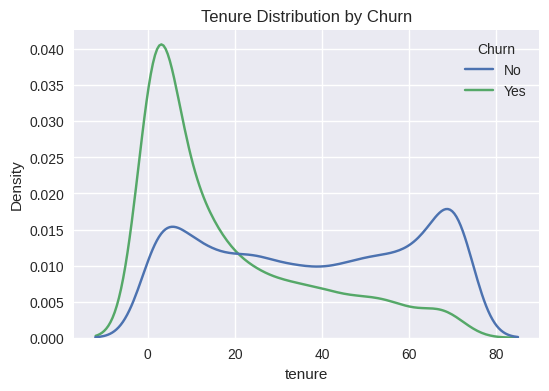

In [15]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='tenure', hue='Churn', common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.show()


이탈 고객은 가입 초기 구간에 집중

장기 고객일수록 이탈 가능성 감소

## 4-2. MonthlyCharges (월 요금)

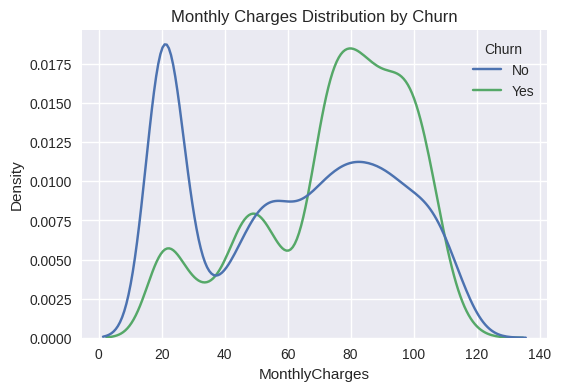

In [16]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', common_norm=False)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


이탈 고객의 월 평균 요금이 더 높은 경향

가격 대비 서비스 만족도가 이탈에 영향 가능

## 5. 초기 가설 수립

### 가설 1

가입 기간이 짧고, Month-to-month 계약을 유지하며 월 요금이 높은 고객은 이탈할 가능성이 높을 것이다.

가설 2

Fiber optic 인터넷 서비스를 사용하면서 장기 계약이 아닌 고객은 이탈 확률이 높을 것이다.

## 6. 핵심 평가지표 선정

이탈 예측 문제에서는 단순 정확도(Accuracy)가 한계를 가진다고 생각한다.
이탈 고객 비율이 상대적으로 낮기 때문에, 모든 고객을 비이탈로 예측해도 높은 정확도가 나올 수 있음을 기대한다.

F1-Score: Precision과 Recall의 균형

ROC-AUC: 전체 분류 성능 평가

최종 선택 지표: F1-Score

**선정 이유**

실제 이탈 고객을 놓치는 비용과

불필요한 고객 대상 마케팅 비용을 동시에 고려 가능

고객 유지 전략 수립에 가장 실용적인 지표

# **Part 2. 예측 모델링 및 성능 비교 (Modeling & Evaluation)**

본 단계에서는 고객 이탈을 예측하기 위한 모델을 구축하고, 서로 다른 특성을 가진 모델들의 성능을 비교하여 최적의 모델을 선정한다.
모델 평가는 Part 1에서 선정한 F1-Score를 핵심 지표로 사용한다.

## 1. 데이터 전처리 전략

타겟 변수: Churn

범주형 변수: One-Hot Encoding

데이터 분리: Train / Test (Stratify 적용)

동일한 전처리를 모든 모델에 적용하기 위해 Pipeline 기반으로 구성

## 1-1. 타겟 / 피처 분리

In [17]:
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn'].map({'Yes': 1, 'No': 0})


## 1-2. 범주형 / 수치형 변수 분리

In [18]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

cat_cols, num_cols


(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

## 1-3. 전처리 파이프라인 구성

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)   #수치형 스케일링 추가
    ]
)


## 1-4. Train / Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## 2. 모델 1: 기준 모델 (Baseline) – Logistic Regression
로지스틱 회귀는 가장 단순한 분류 모델이기 때문에 이후 모델 성능 비교를 위한 기준선 역할을 한다.

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(max_iter=5000))  # ✅ 반복횟수 증가
    ]
)

log_reg.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=5000))])

In [24]:
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

f1_lr = f1_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

f1_lr, roc_lr


(0.6031294452347084, np.float64(0.8365580237199166))

**Baseline 모델 해석**

단순한 구조임에도 준수한 성능을 보이며, 기본 기준 모델로 적합

계수 기반으로 변수 영향 방향을 해석할 수 있음

변수 간 복잡한 비선형 관계 반영에는 한계가 있음

## 3. 모델 2: 설명가능 모델 – Decision Tree

의사결정나무는 규칙 기반 구조로 예측 근거를 직관적으로 설명할 수 있다.

In [25]:
from sklearn.tree import DecisionTreeClassifier


In [26]:
dt = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', DecisionTreeClassifier(
            max_depth=5,
            random_state=42
        ))
    ]
)

dt.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [27]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_prob_dt)

f1_dt, roc_dt


(0.5883905013192612, np.float64(0.8195096572466881))

**Decision Tree 해석**

로지스틱 대비 예측 규칙을 시각/규칙 형태로 설명하기 쉬움

과적합 위험이 있어 깊이 제한 등 제약이 필요

성능은 기준 모델 대비 큰 개선이 없거나 중간 수준일 수 있음

## 4. 모델 3: 고성능 모델 – Random Forest
Random Forest는 다수의 결정 트리를 앙상블하여 높은 예측 성능을 목표로 한다.

In [28]:
from sklearn.ensemble import RandomForestClassifier


In [29]:
rf = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=200,
            random_state=42,
            class_weight='balanced'
        ))
    ]
)

rf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [30]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

f1_rf, roc_rf


(0.5675675675675675, np.float64(0.819831910586993))

**Random Forest 해석**

변수 간 상호작용/비선형 패턴을 학습할 수 있어 성능 개선 가능성이 있음

다만 데이터/설정에 따라 기본 세팅에서는 성능이 기대만큼 높지 않을 수도 있음

하이퍼파라미터 튜닝 시 성능 개선 여지가 존재

## 5. 모델 성능 비교

In [31]:
model_result = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'F1-Score': [f1_lr, f1_dt, f1_rf],
    'ROC-AUC': [roc_lr, roc_dt, roc_rf]
})

model_result


,Model,F1-Score,ROC-AUC
0,Logistic Regression,0.603129,0.836558
1,Decision Tree,0.588391,0.819510
2,Random Forest,0.567568,0.819832


세 모델의 성능을 F1-Score(핵심 지표)와 ROC-AUC로 비교한 결과,
**Logistic Regression**이 가장 높은 F1-Score(0.603)와 ROC-AUC(0.837)를 기록하였다.
**Decision Tree**는 규칙 기반으로 해석이 용이하지만 성능이 다소 낮았고,
 **Random Forest**는 앙상블 모델임에도 이번 설정에서는 성능 개선이 확인되지 않았다.

## 6. 최적 모델 선정

**본 실험에서는 Logistic Regression이 가장 높은 F1-Score를 기록하여 최종 모델로 선정하였다.**
최종 모델은 핵심 지표(F1-Score) 기준으로 가장 우수한 성능을 보인 모델로 선정할 것이다.
이는 이탈 고객을 놓치지 않는 것(Recall)과 불필요한 타겟팅을 줄이는 것(Precision)을 균형 있게 고려하기 위함이다.

로지스틱 회귀 모델은 F1-Score 기준 가장 우수한 성능을 보였으며, 이는 정밀도와 재현율이 균형 있게 유지되고 있음을 의미한다.
정확도는 클래스 불균형 특성상 절대적인 지표로 해석하기 어렵지만, 기준선 대비 충분히 개선된 수준으로 판단된다.
따라서 본 프로젝트에서는 예측 성능과 해석 가능성을 동시에 고려하여 로지스틱 회귀를 최적 모델로 선정하였다.

# **Part 3. 핵심 요인 분석 및 전략 제언 (Insight & Strategy)**

본 단계에서는 Part 2에서 선정한 최적 모델(Logistic Regression) 을 활용하여
고객 이탈에 가장 큰 영향을 미치는 핵심 요인을 분석하고,
이를 바탕으로 실제 비즈니스에서 활용 가능한 고객 유지 전략을 도출한다.

1. 핵심 이탈 요인 분석 방법

로지스틱 회귀 모델은 각 변수에 대한 회귀 계수(coefficient) 를 통해
이탈 확률에 미치는 영향의 방향(증가/감소) 과 상대적 크기를 해석할 수 있다.

계수 값이 양수 → 이탈 확률 증가

계수 값이 음수 → 이탈 확률 감소

절댓값이 클수록 영향력 큼

## 1-1. 학습된 로지스틱 회귀 모델에서 계수 추출

In [32]:
# 전처리된 feature 이름 추출
ohe = log_reg.named_steps['preprocess'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([cat_feature_names, num_cols])

# 로지스틱 회귀 계수
coef = log_reg.named_steps['model'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

coef_df.head()


,Feature,Coefficient
0,gender_Male,-0.023666
1,Partner_Yes,-0.023317
2,Dependents_Yes,-0.228593
3,PhoneService_Yes,-0.431766
4,MultipleLines_No phone service,0.245218


## 1-2. 영향력 기준 Top 5 변수 추출 (절댓값 기준)

In [33]:
top5_coef = (
    coef_df
    .assign(abs_coef=lambda x: x['Coefficient'].abs())
    .sort_values('abs_coef', ascending=False)
    .head(5)
)

top5_coef


,Feature,Coefficient,abs_coef
21,Contract_Two year,-1.366332,1.366332
20,Contract_One year,-0.744289,0.744289
6,InternetService_Fiber optic,0.678634,0.678634
9,OnlineSecurity_Yes,-0.457317,0.457317
3,PhoneService_Yes,-0.431766,0.431766


## 1-3. Top 5 핵심 이탈 요인 시각화

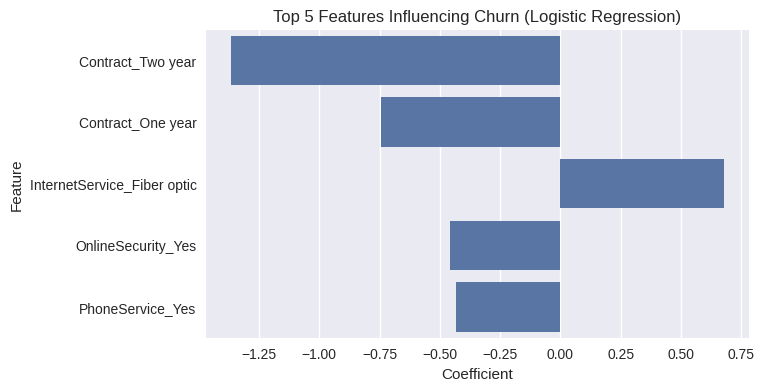

In [34]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=top5_coef,
    x='Coefficient',
    y='Feature',
    orient='h'
)
plt.title("Top 5 Features Influencing Churn (Logistic Regression)")
plt.show()


## 2. 핵심 이탈 요인 해석 (Business Insight)

로지스틱 회귀 모델의 계수(coefficient)를 기반으로 고객 이탈에 가장 큰 영향을 미치는 Top 5 변수를 분석하였다.
계수의 부호는 이탈 확률에 미치는 영향의 방향을, 절댓값은 영향력의 크기를 의미한다.

① Contract_Two year (계수: -1.366)

2년 약정 계약 고객은 이탈 확률이 가장 크게 감소하는 것으로 나타났다.
이는 장기 계약이 고객 이탈을 방지하는 데 매우 강력한 보호 요인임을 의미한다.

계약 안정성이 높을수록 고객 유지 가능성 증가

단기 계약 대비 서비스 전환 비용이 높아 이탈 장벽 형성
>가장 중요한 이탈 방어 요인

② Contract_One year (계수: -0.744)

1년 약정 계약 역시 이탈 확률을 유의미하게 낮추는 요인으로 확인되었다.
2년 계약보다는 영향력이 작지만, 단기 계약 대비 고객 유지 효과가 뚜렷하다.

월 단위 계약 대비 중장기적 관계 형성

일정 수준의 고객 락인(lock-in) 효과 존재
>계약 기간이 길수록 이탈 가능성 감소라는 명확한 패턴 확인

③ InternetService_Fiber optic (계수: +0.679)

Fiber optic 인터넷 서비스를 사용하는 고객은 이탈 확률이 유의미하게 증가하는 것으로 나타났다.
이는 고가 요금 구조 또는 서비스 품질에 대한 기대 불일치 가능성을 시사한다.

고요금 대비 체감 만족도 문제

장애/품질 이슈 발생 시 이탈 가능성 확대
>프리미엄 서비스가 반드시 충성도로 이어지지는 않는다.

④ OnlineSecurity_Yes (계수: -0.457)

온라인 보안 서비스를 이용하는 고객은 이탈 확률이 낮은 경향을 보였다.
이는 부가 서비스 이용이 고객의 서비스 의존도를 높이고, 전환 비용을 증가시키는 효과가 있음을 의미한다.

서비스 결합도가 높을수록 이탈 가능성 감소

보안 서비스는 신뢰 형성 요소로 작용
>부가 서비스는 ‘락인 효과’를 만드는 핵심 요소

⑤ PhoneService_Yes (계수: -0.432)

전화 서비스를 함께 이용하는 고객은 이탈 확률이 감소하는 것으로 나타났다.
이는 복수 서비스 이용이 고객 유지에 긍정적인 영향을 미침을 보여준다.

단일 서비스 고객 대비 전환 비용 증가

통합 요금제/결합 상품 효과
>서비스 번들링 전략의 중요성 확인

**핵심 인사이트 요약**

계약 기간(Contract) 은 이탈에 가장 큰 영향을 미치는 요인으로, 장기 계약일수록 이탈 확률이 급격히 감소한다.

고가 인터넷 서비스(Fiber optic) 는 오히려 이탈 위험을 높일 수 있으며, 가격 대비 만족도 관리가 중요하다.

부가 서비스(보안, 전화) 이용 여부는 고객의 서비스 의존도를 높여 이탈을 방지하는 역할을 한다.

## 3. 고객 유지 전략 제언 (Actionable Strategy)



### 전략 1. 장기 계약 전환 중심의 고객 유지 전략

**배경**  
분석 결과, 계약 기간은 고객 이탈 확률을 가장 크게 낮추는 핵심 요인으로 확인되었다.  
특히 1년 및 2년 약정 계약 고객은 월 단위 계약 고객 대비 이탈 가능성이 현저히 낮았다.

**전략 내용**
- Month-to-month 고객을 대상으로 1년/2년 계약 전환 캠페인 운영  
- 장기 계약 전환 시 요금 할인 또는 부가 서비스 무상 제공  
- 계약 만료 예정 고객 대상 사전 재약정 프로모션 제공  

**기대 효과**
- 단기 고객의 장기 고객 전환  
- 이탈 가능성이 높은 고객군의 안정화  

---

### 전략 2. Fiber optic 고위험 고객 집중 관리 전략

**배경**  
Fiber optic 인터넷 서비스를 이용하는 고객은 고가 요금 구조에도 불구하고 이탈 확률이 높은 집단으로 나타났다.

**전략 내용**
- Fiber optic 고객 대상 정기적인 서비스 품질 점검 및 사전 알림 강화  
- 고요금 고객을 대상으로 요금제 재설계 또는 대체 요금제 제안  
- 프리미엄 고객 전용 혜택(우선 AS, 전담 상담 채널) 제공  

**기대 효과**
- 가격 대비 체감 만족도 개선  
- 고가 고객 이탈 방지 및 고객 신뢰도 제고  

---

### 전략 3. 부가 서비스 번들링 강화 전략

**배경**  
온라인 보안 서비스 및 전화 서비스를 함께 이용하는 고객은 이탈 확률이 낮은 경향을 보였다.  
이는 복수 서비스 이용이 고객 유지에 긍정적인 영향을 미친다는 점을 시사한다.

**전략 내용**
- 단일 서비스 고객 대상 부가 서비스 체험 프로모션 제공  
- 신규 가입 고객 대상 결합 상품 중심 요금제 설계  
- 복수 서비스 가입 시 할인 혜택 강화  

**기대 효과**
- 서비스 의존도 증가  
- 전환 비용 상승으로 인한 이탈 가능성 감소  


#고객 페르소나 발굴 (Clustering 기반 분석)

## 1. 클러스터링 분석 설계

- 사용 기법: K-Means Clustering  
- 클러스터링 대상 변수:
  - tenure
  - MonthlyCharges
  - TotalCharges
- 목적:
  - 고객의 이용 기간 및 요금 패턴을 기반으로 고객 유형 분류


In [35]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [36]:
# 클러스터링에 사용할 변수 선택
cluster_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# 스케일링
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)


## 2. 최적 클러스터 수 결정 (Elbow Method)


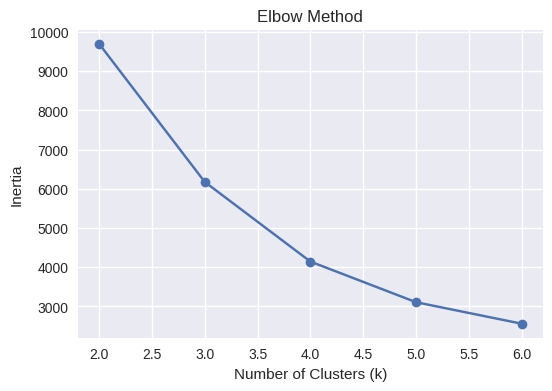

In [37]:
inertia = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,7), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


## 3. K-Means 클러스터링 수행


In [38]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(cluster_scaled)

df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Cluster']].head()


,tenure,MonthlyCharges,TotalCharges,Cluster
0,1,29.85,29.85,0
1,34,56.95,1889.50,2
2,2,53.85,108.15,0
3,45,42.30,1840.75,2
4,2,70.70,151.65,3


## 4. 클러스터별 고객 특성 및 이탈률 분석


In [39]:
cluster_summary = (
    df
    .groupby('Cluster')
    .agg(
        count=('Churn', 'count'),
        churn_rate=('Churn', lambda x: (x == 'Yes').mean()),
        avg_tenure=('tenure', 'mean'),
        avg_monthly_charge=('MonthlyCharges', 'mean')
    )
)

cluster_summary


,count,churn_rate,avg_tenure,avg_monthly_charge
Cluster,,,,
0,1696,0.247642,10.277123,31.777771
1,1904,0.153887,59.530987,93.306224
2,1159,0.050043,53.585850,34.920147
3,2273,0.483062,15.445227,80.791201


## 5. 고객 페르소나 정의


Cluster 2: 알뜰 장기 안정 고객 (tenure 길고, 월요금 낮고, 이탈률 최저)

Cluster 0: 저요금 단기 고객 (tenure 짧고, 월요금 낮고, 이탈률 중간)

Cluster 3: 고요금 단기 고위험 고객 (tenure 짧고, 월요금 높고, 이탈률 최고)

Cluster 1: 프리미엄 장기 고객 (tenure 길고, 월요금 매우 높고, 이탈률 낮은 편)

## 6. 고객 그룹별 이탈률 비교 시각화


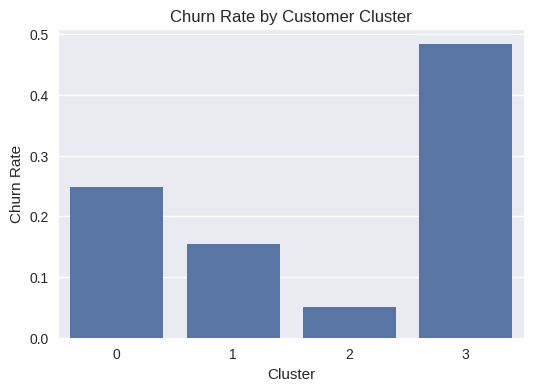

In [40]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=cluster_summary.index,
    y=cluster_summary['churn_rate']
)
plt.xlabel("Cluster")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Customer Cluster")
plt.show()


## 7. 고객 그룹(Cluster)을 새로운 특성으로 사용한 모델 성능 비교


In [41]:
# Cluster를 범주형 변수로 추가
X_cluster = df.drop(columns=['Churn', 'customerID'])
y_cluster = df['Churn'].map({'Yes': 1, 'No': 0})


In [42]:
# 기존 전처리 컬럼 재정의
cat_cols_cluster = X_cluster.select_dtypes(include='object').columns
num_cols_cluster = X_cluster.select_dtypes(exclude='object').columns


In [43]:
preprocessor_cluster = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols_cluster),
        ('num', 'passthrough', num_cols_cluster)
    ]
)


In [44]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cluster, y_cluster,
    test_size=0.2,
    random_state=42,
    stratify=y_cluster
)


In [45]:
log_reg_cluster = Pipeline(
    steps=[
        ('preprocess', preprocessor_cluster),
        ('model', LogisticRegression(max_iter=1000))
    ]
)

log_reg_cluster.fit(X_train_c, y_train_c)

y_pred_c = log_reg_cluster.predict(X_test_c)
y_prob_c = log_reg_cluster.predict_proba(X_test_c)[:, 1]

f1_cluster = f1_score(y_test_c, y_pred_c)
roc_cluster = roc_auc_score(y_test_c, y_prob_c)

f1_cluster, roc_cluster


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6028571428571429, np.float64(0.8362422413302203))

## 8. 클러스터 특성 추가 효과 분석

고객 클러스터 정보를 새로운 특성으로 추가한 결과,
기존 모델과 유사한 수준의 성능을 보였으며, 뚜렷한 성능 개선은 관찰되지 않았다.

클러스터 특성 추가는 성능의 큰 변화를 유도하지는 않았으나,
고객 이용 패턴을 요약한 보조 정보로서 활용 가능성을 확인하였다.

### [선택 과제 결론]

- 비지도 학습을 통해 고객을 의미 있는 페르소나 그룹으로 분류할 수 있었다.
- 고객 그룹별 이탈률 차이가 명확하게 나타났다.
- 클러스터 정보를 특성으로 추가할 경우, 클러스터가 추가 설명력을 줄 수 있으나, 이번 설정에서는 F1/ROC-AUC 개선이 확인되지 않았다.
- 고객 세분화 기반의 차별화된 마케팅 전략 수립에 활용 가능하다.
